# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Исходные данные
**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата  

**Целевой признак**
- Exited — факт ухода клиента


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Комментарий-ревьюера-v3" data-toc-modified-id="-Комментарий-ревьюера-v3-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span> Комментарий ревьюера v3</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#знакомство-с-данными" data-toc-modified-id="знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>знакомство с данными</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#предобработка-данных" data-toc-modified-id="предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>предобработка данных</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span></li><li><span><a href="#разбиение-на-подвыборки" data-toc-modified-id="разбиение-на-подвыборки-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>разбиение на подвыборки</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#смотрю-на-баланс-классов" data-toc-modified-id="смотрю-на-баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>смотрю на баланс классов</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span></li><li><span><a href="#Функция-для-проверок-моделей" data-toc-modified-id="Функция-для-проверок-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Функция для проверок моделей</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#Модель-случайного-леса¶" data-toc-modified-id="Модель-случайного-леса¶-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Модель случайного леса¶</a></span></li><li><span><a href="#Модель-k-ближайщих-соседей" data-toc-modified-id="Модель-k-ближайщих-соседей-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Модель k-ближайщих соседей</a></span></li><li><span><a href="#ROC-кривые-для-моделей" data-toc-modified-id="ROC-кривые-для-моделей-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>ROC-кривые для моделей</a></span><ul class="toc-item"><li><span><a href="#для-решающего-дерева" data-toc-modified-id="для-решающего-дерева-2.11.1"><span class="toc-item-num">2.11.1&nbsp;&nbsp;</span>для решающего дерева</a></span></li><li><span><a href="#для-случайного-леса" data-toc-modified-id="для-случайного-леса-2.11.2"><span class="toc-item-num">2.11.2&nbsp;&nbsp;</span>для случайного леса</a></span></li><li><span><a href="#для-k-ближних-соседей" data-toc-modified-id="для-k-ближних-соседей-2.11.3"><span class="toc-item-num">2.11.3&nbsp;&nbsp;</span>для k-ближних соседей</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#взвешивание-классов" data-toc-modified-id="взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>взвешивание классов</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span><ul class="toc-item"><li><span><a href="#решающее-дерево" data-toc-modified-id="решающее-дерево-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>решающее дерево</a></span></li><li><span><a href="#случайный-лес" data-toc-modified-id="случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>случайный лес</a></span></li></ul></li><li><span><a href="#upsampling" data-toc-modified-id="upsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>upsampling</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span><ul class="toc-item"><li><span><a href="#решающее-дерево" data-toc-modified-id="решающее-дерево-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>решающее дерево</a></span></li><li><span><a href="#случайный-лес" data-toc-modified-id="случайный-лес-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>случайный лес</a></span></li><li><span><a href="#модель-k-ближних-соседей" data-toc-modified-id="модель-k-ближних-соседей-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>модель k-ближних соседей</a></span></li></ul></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>downsampling</a></span><ul class="toc-item"><li><span><a href="#решающее-дерево" data-toc-modified-id="решающее-дерево-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>решающее дерево</a></span></li><li><span><a href="#случайный-лес" data-toc-modified-id="случайный-лес-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>случайный лес</a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span><ul class="toc-item"><li><span><a href="#модель-k-ближних-соседей" data-toc-modified-id="модель-k-ближних-соседей-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>модель k-ближних соседей</a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#решающее-дерево" data-toc-modified-id="решающее-дерево-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>решающее дерево</a></span></li><li><span><a href="#случайный-лес" data-toc-modified-id="случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>случайный лес</a></span></li><li><span><a href="#модель-k-ближних-соседей" data-toc-modified-id="модель-k-ближних-соседей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>модель k-ближних соседей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#-Комментарий-ревьюера-v1" data-toc-modified-id="-Комментарий-ревьюера-v1-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span> Комментарий ревьюера v1</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span></li><li><span><a href="#изменение-порога-вероятности-для-модели-с-самым-низким-f1-(несбалансированнаяя-выборка)" data-toc-modified-id="изменение-порога-вероятности-для-модели-с-самым-низким-f1-(несбалансированнаяя-выборка)-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>изменение порога вероятности для модели с самым низким f1 (несбалансированнаяя выборка)</a></span></li><li><span><a href="#изменение-порога-вероятности-для-модели-с-самым-высоким-f1-(сбалансированнаяя-выборка)" data-toc-modified-id="изменение-порога-вероятности-для-модели-с-самым-высоким-f1-(сбалансированнаяя-выборка)-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>изменение порога вероятности для модели с самым высоким f1 (сбалансированнаяя выборка)</a></span></li><li><span><a href="#-Комментарий-ревьюера-v3" data-toc-modified-id="-Комментарий-ревьюера-v3-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span> Комментарий ревьюера v3</a></span></li><li><span><a href="#-Комментарий-ревьюера-v2" data-toc-modified-id="-Комментарий-ревьюера-v2-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span> Комментарий ревьюера v2</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span><ul class="toc-item"><li><span><a href="#-Итоговый-комментарий-" data-toc-modified-id="-Итоговый-комментарий--5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span> Итоговый комментарий </a></span></li><li><span><a href="#-Итоговый-комментарий-2" data-toc-modified-id="-Итоговый-комментарий-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span> Итоговый комментарий 2</a></span></li></ul></li></ul></div>

## Подготовка данных

In [1]:
# ячейка импорта
import pandas as pd
import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns            # для построения графиков
import warnings                  # добавил чтобы убирать предупреждения


from sklearn.preprocessing import OrdinalEncoder     # для преобразование категориальных признаков в численные
from sklearn.preprocessing import StandardScaler     # для масштабирования
from sklearn.model_selection import train_test_split  # для разбиения на выборки

# модели
from sklearn.tree import DecisionTreeClassifier      # модель решающего дерева
from sklearn.ensemble import RandomForestClassifier  # модель случайного леса
# from sklearn.linear_model import LogisticRegression  # модель логистической регрессии
from sklearn.neighbors import KNeighborsClassifier    # модель k-ближайших соседей

# from sklearn.metrics import accuracy_score           # для подсчета точности
from sklearn.metrics import f1_score              # для подсчета f1
from sklearn.metrics import roc_auc_score          # для подсчета roc_auc_score
from sklearn.metrics import roc_curve              # для построения ROC-кривой

from sklearn.utils import shuffle                  # для перемешивания при балансировании выборок   

from sklearn.model_selection import GridSearchCV # для того чтобы попробовать применить GridSearchCV
import numpy as np                               # для того чтобы попробовать перебрать пороги вероятностей

In [2]:
# открытие файла (на случай если буду открывать вне тренажера, прописал альтернативный путь)
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data_path = 'C:/Users/v.kozlovskiy/Desktop/LRN_on_desk/9/'
    data = pd.read_csv(data_path + 'Churn.csv')

### знакомство с данными

In [3]:
# сразу посмотрю на таблицу
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
# и посмотрю методом .info()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [5]:
# не думаю что применение .describe() сильно пригодится, но и лишним не будет
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# применю .describe() и не для числовых данных
data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
# посмотрю на распределение значений целевого признака и признаков, которые похожи на категориальные численные
[display(data[i].value_counts()) for i in ['Exited', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']]

0    7963
1    2037
Name: Exited, dtype: int64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64

1    5151
0    4849
Name: IsActiveMember, dtype: int64

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

[None, None, None, None, None]

In [8]:
# посмотрю на матрицу корреляций
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


При первом взгляде на данные у меня появились следующие мысли:
- столбцы RowNumber, CustomerId и Surname - ничем не помогут в модели и их нужно удалить: RowNumber - индекс, CustomerId - уникальный идентификатор и не думаю, что он поможет, Surname - фамилия (здесь может быть и есть какой-то смысл, но думаю, что его малореально уловить)
- столбец Exited (целевой признак) - представлен в значениях 1 и 0 - значит будут использоваться модели для классификации - его планирую выделить на ранних этапах
- столбцы Geography и Gender - категориальные - их надо будет преобразовать в численные
- столбцы NumOfProducts, HasCrCard и IsActiveMember выглядят как категориальные численные (в общем-то Tenure мне тоже кажется таким, хотя там больше вариантов значений - 11)
- у целевого признака есть дисбаланс классов - примерно 4 к 1 (про это шла речь в задании и с этим надо будет работать)
- масштаб признаков разный (EstimatedSalary, Age, CreditScore) их надо будет масштабировать
- между признаками не наблюдается корреляций - значить удалять какой-то из сильно скоррелированных не потребуется
- в признаке Tenure много пропусков (около 11%) - думаю, что их надо удалять, было бы неплохо заменить, но не вижу способа корректно это сделать (по идее возраст может быть связан, но это скорее спекуляция - корреляция -0.13 и вообще сколько-нибудь заметных корреляций у Tenure c другими признаками не вижу.
- всегда рекомендовали переводить названия столбцов в "змеиный регистр"

### предобработка данных

In [9]:
# сначала уменьшу датасет по пропускам Tenure (reset_index применил т.к. дальше иначе не получалось подставить преобразованные категориальные данные)
data = data.dropna(subset=['Tenure']).reset_index(drop=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 994.5+ KB


In [11]:
# удалю столбцы которые не понадобятся
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
# переведу названия оставшихся столбцов в "змеиный регистр"
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
data.columns = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

In [14]:
# посмотрю на таблицу
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [15]:
# на этом этапе выделю выборки с целевым признаком и с остальными (с ними еще буду работать)
features_base = data.drop(['exited'], axis=1) # сначала выделю датасет с features
target_base = data['exited'] # и датасет с целевым признаком

In [16]:
features_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 710.4+ KB


In [20]:
# переведу geography и gender в численные признаки c помощью one-hot-encoding
# num_pord = pd.get_dummies(features_base['num_of_products'], drop_first=True) # преобразование с удалением первого столбца (чтобы избежать "дамми-ловушки")
geo = pd.get_dummies(features_base['geography'], drop_first=True)
gen = pd.get_dummies(features_base['gender'], drop_first=True)

In [21]:
# удаление из основного датафрейма стобцов, которые преобразовал
features_base = features_base.drop(['geography', 'gender'], axis=1) 

In [22]:
# присоединение признаков преобразованных через one-hot-encoding 
# (наверное это можно сделать как-то в одно действие, но здесь так сумел)
#features_base = features_base.merge(num_pord, on=features_base.index, how='left')
#features_base = features_base.drop(['key_0'], axis=1)

features_base = features_base.merge(geo, on=features_base.index, how='left')
features_base = features_base.drop(['key_0'], axis=1)

features_base = features_base.merge(gen, on=features_base.index, how='left')
features_base = features_base.drop(['key_0'], axis=1)

In [23]:
features_base

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Germany,Spain,Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9086,800,29,2.0,0.00,2,0,0,167773.55,0,0,0
9087,771,39,5.0,0.00,2,1,0,96270.64,0,0,1
9088,516,35,10.0,57369.61,1,1,1,101699.77,0,0,1
9089,709,36,7.0,0.00,1,0,1,42085.58,0,0,0


**Сделал преобразование с помощью one-hot-encoding - преобразовал столбцы geography, gender и num_of_products**

как я понял OrdinalEncoder() так же категоризирует и количественные признаки - поэтому из таблицы выше возьму только gender и geography - и больше таблицу data_ordinal использовать не буду


теперь хочу масштабировать оставшиеся количественные признаки - тут у меня есть определенные сомнения, но признаки, которые имеют только значения 1 или 0 масштабировать думаю, что не стоит (смторел вывод таблицы после масштабирования и видел, что данные принимают значения в диапазонах -2 - 5 и т.п.), но те категориальные численные признаки, у которых больше двух значений считаю нужным тоже масштабировать.

(вообще этот момент один из тех которые вызывают наибольшую неуверенность)

**масштабирование сделаю позже и на меньшем числе столбцов - без преобразованных с one-hot-encoding**

Таблицы с признаками и с целевым признаком готовы - далее разобью их на тренировочные, обучающие и тестовые выборки

### разбиение на подвыборки

В тренажере и предыдущем проекте рассмтривали подохд деления выборки на тренировочную, обучающую и тестовую (валидацию на валидационной выборке). На семинаре была продемонстрирована кросс-валидация (насколько я понимаю это более эффективный, но и ресурсозатратный подход) - далее в схеме курса видел, что валидацию изучать планируется в следующем спринте - поэтому здесь решил её не использовать (хотя если потребуется могу попробовать).  

тренировочная, валидационная и тестовая выборки должны быть разбиты в соотношении (60 - 20 - 20)%  
поэтому сначала test_size укажу = 0.2   
а на втором этапе укажу 0.25 (т.к. она отделяется от оствашихся 80% - так будет достигнуто соотношение 60-20-20)

In [26]:
features, features_test, target, target_test = train_test_split(        # здесь идет отделение тестовой выборки 
    features_base, target_base, test_size=0.2, random_state=12345)      #(с ней в ближайшем шаге не буду работать)

features_train, features_valid, target_train, target_valid = train_test_split(   # здесь идет разделение оставшихся данных 
    features, target, test_size=0.25, random_state=12345)                         # на тренировочную и валидационную выборки

print('Размер тренировочной выборки признаков:', features_train.shape)
print('Размер тренировочной выборки целевого признака:', target_train.shape)
print('Размер валидационной выборки признаков:', features_valid.shape)
print('Размер валидационной выборки целевого признака:', target_valid.shape)
print('Размер тестовой выборки признаков:', features_test.shape)
print('Размер тестовой выборки целевого признака:', target_test.shape)

Размер тренировочной выборки признаков: (5454, 11)
Размер тренировочной выборки целевого признака: (5454,)
Размер валидационной выборки признаков: (1818, 11)
Размер валидационной выборки целевого признака: (1818,)
Размер тестовой выборки признаков: (1819, 11)
Размер тестовой выборки целевого признака: (1819,)


<a id='split'></a>
выборки готовы далее буду с ними работать **кроме этого буду иметь в виду выборки features и target (исходная + валидационная) - исходя из комментариев понял, что она тоже пригодится**

**Масштабирование**
на этом этапе сделаю масштабирование отдельно для каждого датафрейма с признакми (для столбцов с количественными данными) 

In [27]:
# столбцы для масштабирования
numeric = ['num_of_products', 'credit_score', 'age', 'balance', 'estimated_salary', 'tenure']

scaler = StandardScaler()

# масштабирование

scaler.fit(features_test[numeric])           # тестовая выборка
features_test[numeric] = scaler.transform(features_test[numeric])

scaler.fit(features[numeric])                 # тренировочная + валидационная
features[numeric] = scaler.transform(features[numeric])

scaler.fit(features_train[numeric])          # тренировочная выборка
features_train[numeric] = scaler.transform(features_train[numeric])

scaler.fit(features_valid[numeric])         # валидационная выборка
features_valid[numeric] = scaler.transform(features_valid[numeric])


/tmp/ipykernel_119/87992806.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_119/87992806.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [28]:
features_test

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Germany,Spain,Male
769,0.726530,0.211264,0.70703,0.622801,-0.925442,1,1,0.317659,0,0,1
8841,-1.326070,0.592597,-1.40131,-1.197829,-0.925442,0,1,1.615145,0,0,0
1548,0.537060,-0.360736,-0.69853,-0.292555,-0.925442,1,0,-1.414148,0,1,0
7842,0.779161,-0.646737,1.40981,0.841339,-0.925442,0,0,-0.661228,0,0,0
4796,-0.778710,-0.837403,-1.04992,-1.197829,0.817186,1,1,0.586520,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6986,-0.578713,0.211264,-0.69853,-1.197829,0.817186,1,0,-0.776359,0,1,0
7557,0.589690,-0.837403,0.35564,-1.197829,0.817186,1,0,0.944190,0,1,0
3524,1.610727,-0.265403,1.40981,-0.097569,0.817186,0,1,0.184872,0,0,1
4961,-0.052405,-0.456070,1.40981,-1.197829,0.817186,1,0,0.693248,0,0,0


## Исследование задачи

Исходя из логики схемы исследования в этом пункте планирую посмотреть на баланс классов и далее подобрать оптимальные гиперпараметры для моделей без учета баланса классов. random_state везде буду принимать равным 12345

### смотрю на баланс классов

In [29]:
target_train.value_counts()

0    4335
1    1119
Name: exited, dtype: int64

видно то же что и на этапе знакомства с данными соотношение примерно 4 к 1

### Функция для проверок моделей

у функции несколько аргументов:

- model_type: 'tree' - Решающее дерево, 'forest' - Случайный лес, 'k_nei' - К-ближних соседей
- features - обучающие признаки
- target - целевые признаки
- features_val - признаки на валидационной (или тестовой выборке)
- target_val - целевые признаки (или тестовой выборке)
- range_depth_or_k - диапазон значений глубины дерева или числа k
- range_est - диапазон значений числа деревьев
- use_class_weight - использование баланса классов (1 или 0) - актуально для двух моделей - в основном 0

на выходе функция будет выдвать оптимальные гиперпараметры при наибольшем f-1 и так же при наибольшем auc_roc
и строить два графика с распределением их значений

In [30]:
def model_building(model_type, features, target, features_val, target_val, range_depth_or_k, range_est, use_class_weight):

    best_f1 = 0        # переменная для сохранения лучшего значения f-1
    best_depth_f1 = 0  # переменная для сохранения лучшей глубины дерева (или числа k) при этом
    best_ar = 0        # переменная для сохранения лучшего значения auc_roc
    best_depth_ar = 0  # переменная для сохранения лучшей глубины дерева (или числа k) при этом

    depth_list = []    # список для записи глубины деревьев
    f1_list = []       # список для записи f-1 соответствующего глубине
    ar_list = []       # список для записи auc_roc

#   if model_type == 'tree':
    best_est_f1 = 0    # переменная для сохранения лучшего числа деревьев при лучшем f1 
    best_est_ar = 0    # переменная для сохранения лучшего числа деревьев при лучшей auc_roc
    est_list = []      # список для записи числа деревьев

    for est in range_est:
        
        for depth in range_depth_or_k:
        
            if model_type == 'forest':
                if use_class_weight == 0:
                    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
                if use_class_weight == 1:
                    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')       
            
            if model_type == 'tree':
                if use_class_weight == 0:
                    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
                if use_class_weight == 1:
                    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
        
            if model_type == 'k_nei':
                model = KNeighborsClassifier(n_neighbors=depth)
       
      
            model.fit(features, target)                    # обучение модели
            predictions_valid = model.predict(features_val)          # вычисление предсказаний
        
            f1 = f1_score(target_val, predictions_valid)         # вычисление f1
        
            probabilities_valid = model.predict_proba(features_val)   # вычисление вероятностей признаков
            probabilities_one_valid = probabilities_valid[:, 1]         # значения вероятностей класса 1 (уход клиента)

            auc_roc = roc_auc_score(target_val, probabilities_one_valid)   # вычисление auc_roc
    
            ar_list.append(auc_roc)             # добаление значения auc_roc в список для графика
            depth_list.append(depth)            # добаление значения глубины дерева в список для графика
            f1_list.append(f1)          # добаление значения f-1 в список для графика
            est_list.append(est)                # добаление значения числа деревьев в список для графика
         
            if f1 > best_f1:            # выцепление лучшего значения f-1 и соответствующей глубины дерева и числа деревьев
                best_f1 = f1
                best_depth_f1 = depth
            
                if model_type == 'forest': 
                    best_est_f1 = est
                  
            if auc_roc > best_ar:               # выцепление лучшего значения auc_roc и соответствующей глубины дерева и числа деревьев
                best_depth_ar = depth
                best_ar = auc_roc 
            
                if model_type == 'forest': 
                    best_est_ar = est

    if model_type == 'forest':
        print('Для модели', model_type, 'лучшее значение f-1 на валидационной выборке:', best_f1, 'при этом глубина дерева:', best_depth_f1, 'число деревьев', best_est_f1)
        print('Для модели', model_type, 'лучшее значение auc_roc на валидационной выборке:', best_ar, 'при этом глубина дерева:', best_depth_ar, 'число деревьев', best_est_ar)    
    if model_type == 'tree':
        print('Для модели', model_type, 'лучшее значение f-1 на валидационной выборке:', best_f1, 'при этом глубина дерева:', best_depth_f1)
        print('Для модели', model_type, 'лучшее значение auc_roc на валидационной выборке:', best_ar, 'при этом глубина дерева:', best_depth_ar)  
    if model_type == 'k_nei':
        print('Для модели', model_type, 'лучшее значение f-1 на валидационной выборке:', best_f1, 'при этом число k:', best_depth_f1)
        print('Для модели', model_type, 'лучшее значение auc_roc на валидационной выборке:', best_ar, 'при этом число k:', best_depth_ar)            
            
            
    plt.figure(figsize=(20, 15))
    sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)

    plt.subplot(2, 2, 1)                            
    if model_type == 'tree':
        sns.scatterplot(x=depth_list, y=f1_list)  # диаграмма рассеяния f-1 в зависимости от числа k
        plt.xlabel('Число деревьев', fontsize=12)
        plt.ylabel('f-1 score', fontsize=12)
        plt.title('f-1 в зависимости от числа деревьев')

    if model_type == 'k_nei':
        sns.scatterplot(x=depth_list, y=f1_list)  # диаграмма рассеяния f-1 в зависимости от числа k
        plt.xlabel('Число k', fontsize=12)
        plt.ylabel('f-1 score', fontsize=12)
        plt.title('f-1 в зависимости от числа k')
    
    if model_type == 'forest':
        sns.scatterplot(x=depth_list, y=f1_list, hue=est_list)  # диаграмма рассеяния качетсва модели в зависимости от глубины деревьев
        plt.xlabel('Глубина дерева', fontsize=12)
        plt.ylabel('f-1 score', fontsize=12)            
        plt.legend(title='число деревьев', bbox_to_anchor = (1,1)) # сдвиг легенды
        plt.title('f-1 в зависимости от глубины дерева и числа деревьев', fontsize=12)
   
    plt.subplot(2, 2, 2)
    if model_type == 'tree':
        sns.scatterplot(x=depth_list, y=ar_list)      # диаграмма рассеяния auc_roc в зависимости от числа k
        plt.xlabel('Число деревьев', fontsize=12)
        plt.ylabel('auc_roc score', fontsize=12)
        plt.title('auc_roc в зависимости от числа деревьев')
        
    if model_type == 'k_nei':
        sns.scatterplot(x=depth_list, y=ar_list)  # диаграмма рассеяния f-1 в зависимости от числа k
        plt.xlabel('Число k', fontsize=12)
        plt.ylabel('auc_roc score', fontsize=12)
        plt.title('auc_roc в зависимости от числа k')
    
    if model_type == 'forest':
        sns.scatterplot(x=depth_list, y=ar_list, hue=est_list)  # диаграмма рассеяния качетсва модели в зависимости от глубины деревьев
        plt.xlabel('Глубина дерева', fontsize=12)
        plt.ylabel('auc_roc score', fontsize=12)            
        plt.legend(title='число деревьев', bbox_to_anchor = (1,1)) # сдвиг легенды
        plt.title('auc_roc в зависимости от глубины дерева и числа деревьев', fontsize=12)
        plt.subplots_adjust(wspace=0.35)
    
      
    plt.show()

### Модель решающего дерева

Для модели tree лучшее значение f-1 на валидационной выборке: 0.5595054095826894 при этом глубина дерева: 9
Для модели tree лучшее значение auc_roc на валидационной выборке: 0.8262684595583255 при этом глубина дерева: 7


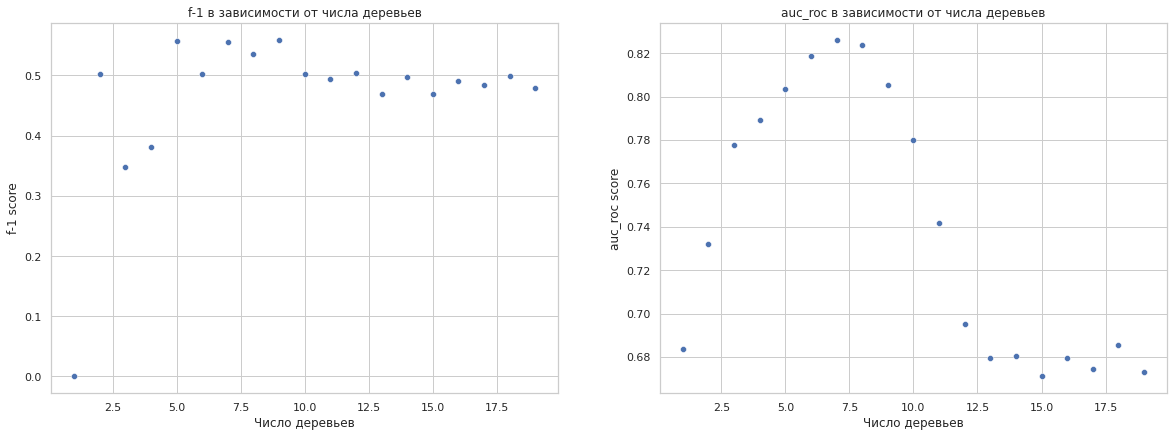

CPU times: user 744 ms, sys: 25.9 ms, total: 770 ms
Wall time: 805 ms


In [31]:
%%time
model_building('tree', features_train, target_train, features_valid, target_valid, range(1, 20), range(1, 2), 0)

In [32]:
%%time
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (1, 20,2),
              'max_depth': range (1, 20) }

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features, target)


CPU times: user 49.8 s, sys: 203 ms, total: 50 s
Wall time: 50.2 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 20),
                         'n_estimators': range(1, 20, 2)})

In [33]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 19}

Максимальное значение f-1 достигается при глубине равной 9, затем несильно снижается с небольшими "волнами". 
значение auc_roc растет до глубины дерева 7, затем держится на одном уровне, а после глубины 8 резко падает 

предыдущий вывод:
До глубины дерева 5 наблюдается рост значения f-1, после оно ступенчато снижается. 
значение auc_roc растет до глубины дерева 5, затем держится на одном уровне, а после глубины 8 резко падает 

### Модель случайного леса¶

Для модели forest лучшее значение f-1 на валидационной выборке: 0.5656565656565656 при этом глубина дерева: 23 число деревьев 21
Для модели forest лучшее значение auc_roc на валидационной выборке: 0.8506883288925018 при этом глубина дерева: 6 число деревьев 22


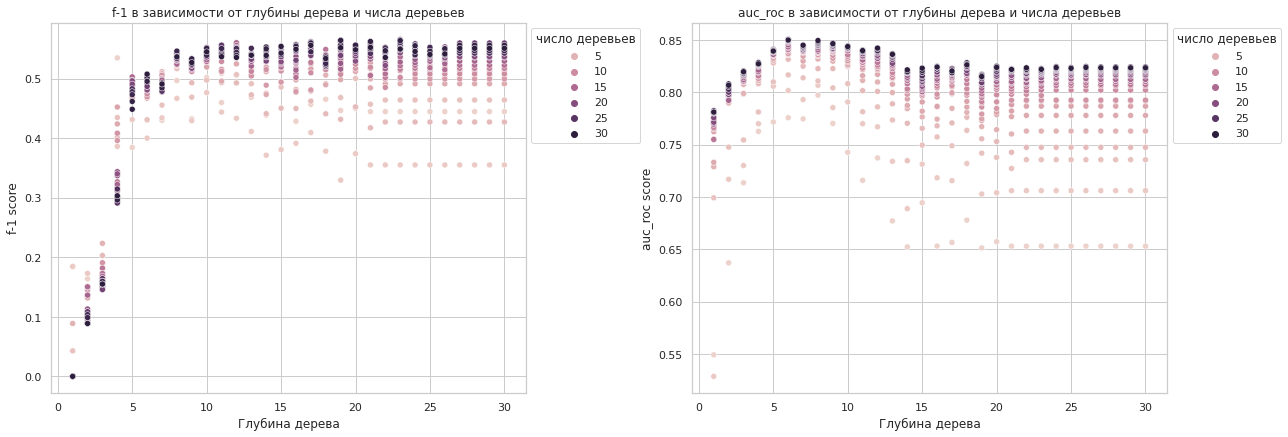

CPU times: user 1min 22s, sys: 235 ms, total: 1min 22s
Wall time: 1min 23s


In [34]:
%%time
model_building('forest', features_train, target_train, features_valid, target_valid, range(1, 31), range(1, 31), 0)

Для модели случайного леса наблюдается рост значения f-1 при небольших глубинах деревьев, затем f-1 изменяется небольшими волнами, максимума достигает при глубине 23 и числу деревьев - 21, при небольшом числе деревьев f-1 c увеличением глубины заметно снижается уже после глубины равной 10. 
auc_roc наибольшее при наибольшем числе деревьев, растет до глубины 6 затем снижается, при малом числе деревьев, за исключением области глубины (4-10 там они относительно выше) значения auc_roc низки

Предыдущий вывод:
Для модели случайного леса наблюдается рост значения f-1 при небольших глубинах деревьев, затем f-1 изменяется небольшими волнами, максимума достигает при глубине 17 и числу деревьев - 27, при небольшом числе деревьев f-1 c увеличением глубины заметно снижается уже после глубины равной 6. 
auc_roc наибольшее при наибольшем числе деревьев, растет до глубины 8 затем снижается, при малом числе деревьев, за исключением области глубины (5-8) значения auc_roc низки

### Модель k-ближайщих соседей

Для модели k_nei лучшее значение f-1 на валидационной выборке: 0.5068027210884353 при этом число k: 5
Для модели k_nei лучшее значение auc_roc на валидационной выборке: 0.8302482725917897 при этом число k: 30


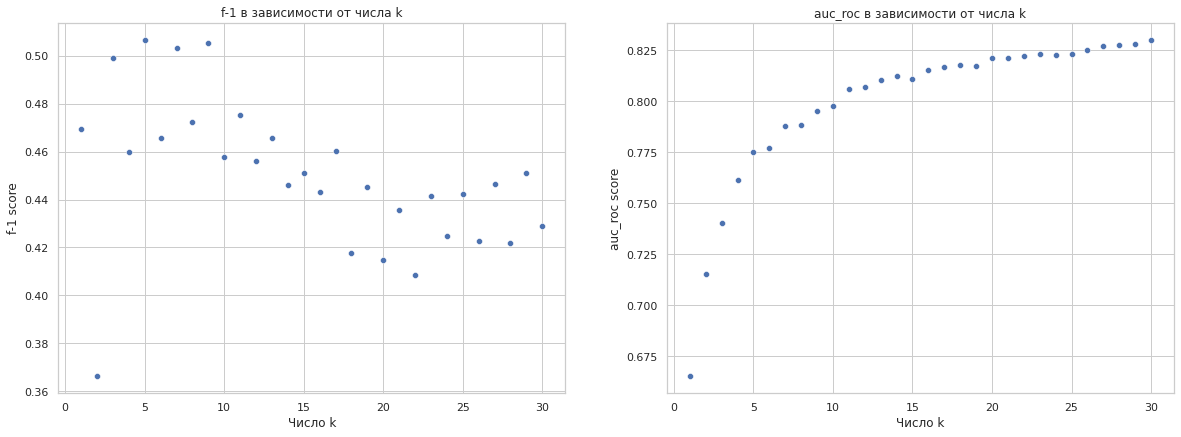

CPU times: user 6.72 s, sys: 31.9 ms, total: 6.75 s
Wall time: 6.76 s


In [35]:
%%time
model_building('k_nei', features_train, target_train, features_valid, target_valid, range(1, 31), range(1, 2), 0)

с ростом чиcла k f-1 для модели растет до k=5, а затем снижается и быстро становится ниже. при этом f-1 выше для нечетных значений k и ниже для четных
auc_roc с ростом k постоянно растет, сначала резко, потом более плавно

Предыдущий вывод:
с ростом чиcла k f-1 для модели растет до k=5, а затем снижается и быстро становится ниже, чем у небольших значений k. при этом f-1 выше для нечетных значений k и ниже для четных
auc_roc с ростом k постоянно растет, сначала резко, потом более плавно

### ROC-кривые для моделей

построю ROC-кривые для моделей с оптимальнми параметрами

#### для решающего дерева

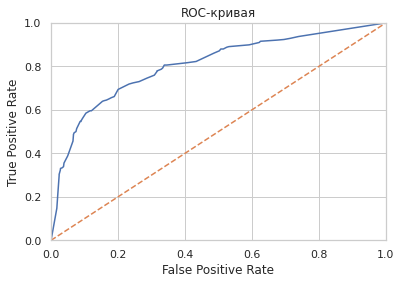

In [36]:
model_tree_unbal = DecisionTreeClassifier(random_state=12345, max_depth=9)

model_tree_unbal.fit(features_train, target_train) # обучение модели

probabilities_valid = model_tree_unbal.predict_proba(features_valid)  # вычисление вероятностей признаков
probabilities_one_valid = probabilities_valid[:, 1]        # значения вероятностей класса 1 (уход клиента)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # вычисление значение fpr, tpr

plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая')  

plt.show()

#### для случайного леса

**оптимальные значения для f-1**

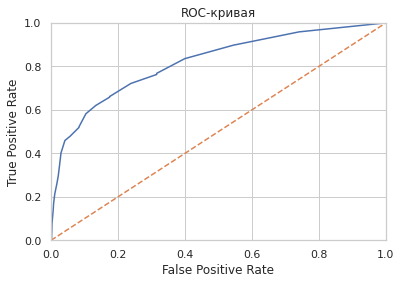

In [37]:
model_forest_unbal = RandomForestClassifier(random_state=12345, n_estimators=21, max_depth=23)

model_forest_unbal.fit(features_train, target_train) # обучение модели

probabilities_valid = model_forest_unbal.predict_proba(features_valid)  # вычисление вероятностей признаков
probabilities_one_valid = probabilities_valid[:, 1]        # значения вероятностей класса 1 (уход клиента)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # вычисление значение fpr, tpr

plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая')  

plt.show()

**оптимальные значения для auc_roc**

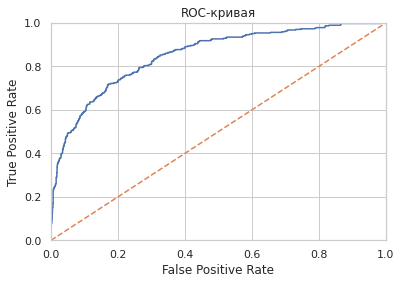

In [38]:
model_forest_unbal_ar = RandomForestClassifier(random_state=12345, n_estimators=22, max_depth=6)

model_forest_unbal_ar.fit(features_train, target_train) # обучение модели

probabilities_valid = model_forest_unbal_ar.predict_proba(features_valid)  # вычисление вероятностей признаков
probabilities_one_valid = probabilities_valid[:, 1]        # значения вероятностей класса 1 (уход клиента)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # вычисление значение fpr, tpr

plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая')  

plt.show()

#### для k-ближних соседей

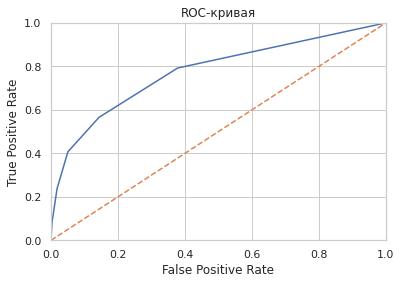

In [39]:
model_k_nei_unbal = KNeighborsClassifier(n_neighbors=5)

model_k_nei_unbal.fit(features_train, target_train) # обучение модели

probabilities_valid = model_k_nei_unbal.predict_proba(features_valid)  # вычисление вероятностей признаков
probabilities_one_valid = probabilities_valid[:, 1]        # значения вероятностей класса 1 (уход клиента)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # вычисление значение fpr, tpr

plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая')  

plt.show()

## Борьба с дисбалансом

### взвешивание классов

из тренажера я понял, что для этого пути надо поставить в модели гиперпараметр class_weight='balanced' (хотя это работает при несильном дисбалансе) и у меня не получилось так сделать для k-ближних соседей

#### решающее дерево

Для модели tree лучшее значение f-1 на валидационной выборке: 0.5549949545913219 при этом глубина дерева: 7
Для модели tree лучшее значение auc_roc на валидационной выборке: 0.8157111351969771 при этом глубина дерева: 7


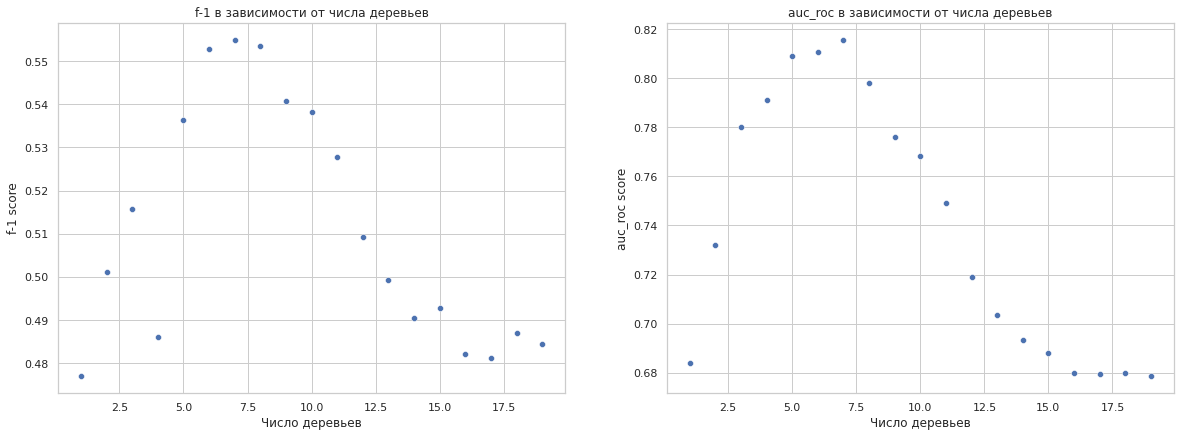

CPU times: user 697 ms, sys: 28 ms, total: 725 ms
Wall time: 735 ms


In [40]:
%%time
model_building('tree', features_train, target_train, features_valid, target_valid, range(1, 20), range(1, 2), 1)

более резкие изменения, чем без учета дисбаланса f-1 выше всего при 7, а затем почти сразу снижается, график изменений auc_roc сходен с предыдущим (как и в предыдущев варианте)

предыдущий вывод:
более резкие изменения, чем без учета дисбаланса f-1 выше всего при 5, а затем почти сразу снижается, график изменений auc_roc сходен с предыдущим 

#### случайный лес

Для модели forest лучшее значение f-1 на валидационной выборке: 0.6010638297872342 при этом глубина дерева: 9 число деревьев 30
Для модели forest лучшее значение auc_roc на валидационной выборке: 0.849375837360189 при этом глубина дерева: 6 число деревьев 28


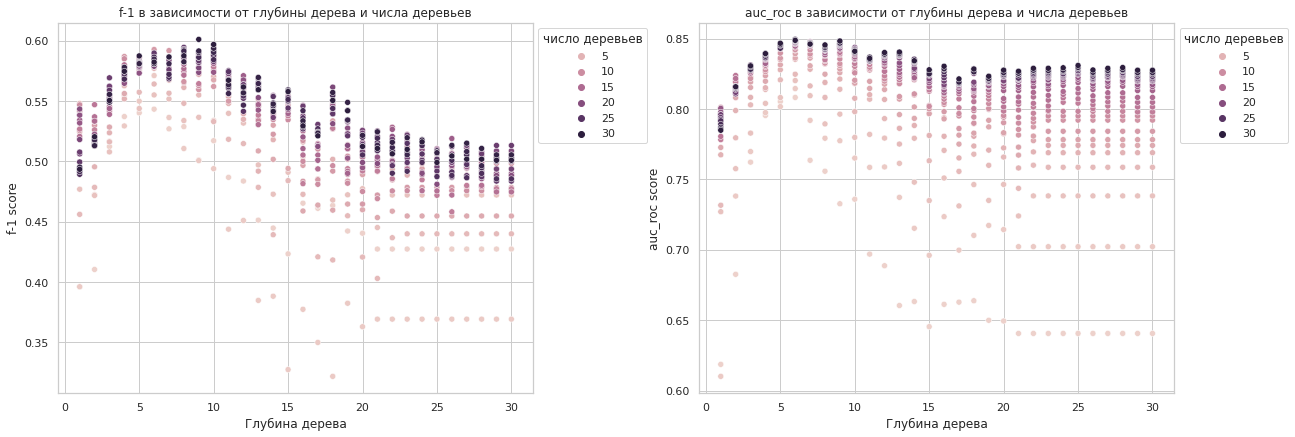

CPU times: user 1min 22s, sys: 268 ms, total: 1min 22s
Wall time: 1min 23s


In [41]:
%%time
model_building('forest', features_train, target_train, features_valid, target_valid, range(1, 31), range(1, 31), 1)

результат похож на предыдущий (хотя сечайс оптимальное число деревьев для f-1 30, глубина - 9), но разница заметна в резком падении f-1 после глубины равной 11

предыдущий вывод:
графики сходными с аналогичными без учета дисбаланса с той разницей, что значения несколько лучше и f-1 после достижения мксимума при глубине 8 резче падает (особено при малом числе деревьев)

### upsampling

In [42]:
target_train.value_counts()

0    4335
1    1119
Name: exited, dtype: int64

In [43]:
# Коэфициент для upsampling
4335 / 1119

3.8739946380697052

In [44]:
# Коэфициент для downsampling
1119 / 4335

0.25813148788927337

In [45]:
# функция для увеличения выборки
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # увеличение выборки признаков, которых меньше
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled = shuffle(features_upsampled, random_state=12345)   # перемешивание
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled  


In [46]:
# применеие функции для upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# размеры выборок
print(features_upsampled.shape)
print(target_upsampled.shape)

(8811, 11)
(8811,)


#### решающее дерево

Для модели tree лучшее значение f-1 на валидационной выборке: 0.5549949545913219 при этом глубина дерева: 7
Для модели tree лучшее значение auc_roc на валидационной выборке: 0.8157431242379082 при этом глубина дерева: 7


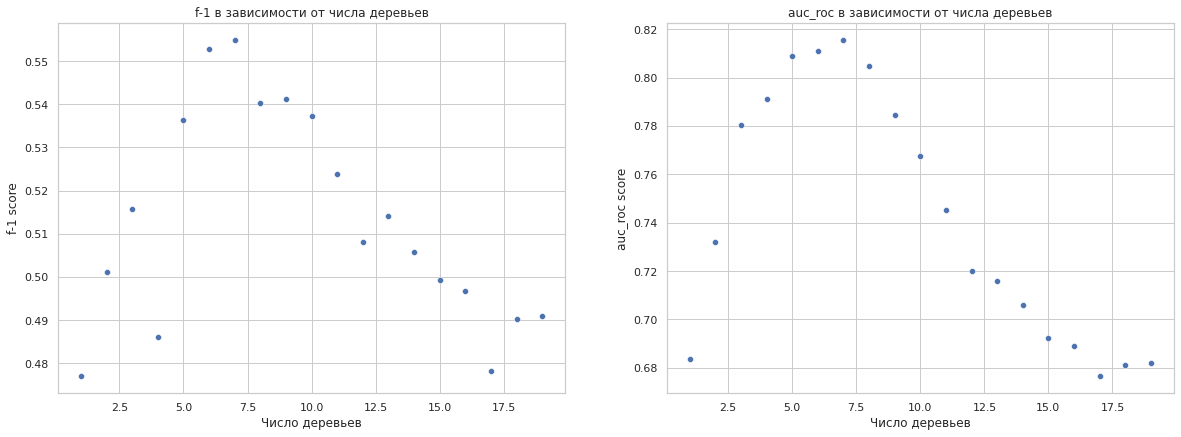

CPU times: user 859 ms, sys: 12 ms, total: 871 ms
Wall time: 895 ms


In [47]:
%%time
model_building('tree', features_upsampled, target_upsampled, features_valid, target_valid, range(1, 20), range(1, 2), 0)

#### случайный лес

Для модели forest лучшее значение f-1 на валидационной выборке: 0.6097560975609756 при этом глубина дерева: 12 число деревьев 25
Для модели forest лучшее значение auc_roc на валидационной выборке: 0.851250018817083 при этом глубина дерева: 7 число деревьев 28


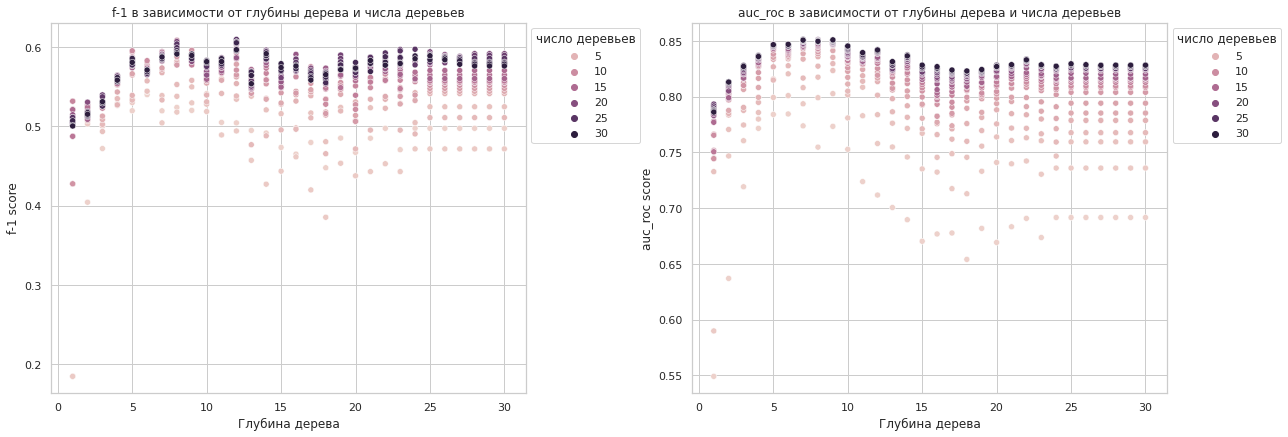

CPU times: user 1min 54s, sys: 308 ms, total: 1min 54s
Wall time: 1min 55s


In [48]:
%%time
model_building('forest', features_upsampled, target_upsampled, features_valid, target_valid, range(1, 31), range(1, 31), 0)

#### модель k-ближних соседей

Для модели k_nei лучшее значение f-1 на валидационной выборке: 0.5596707818930041 при этом число k: 29
Для модели k_nei лучшее значение auc_roc на валидационной выборке: 0.8244206220174922 при этом число k: 29


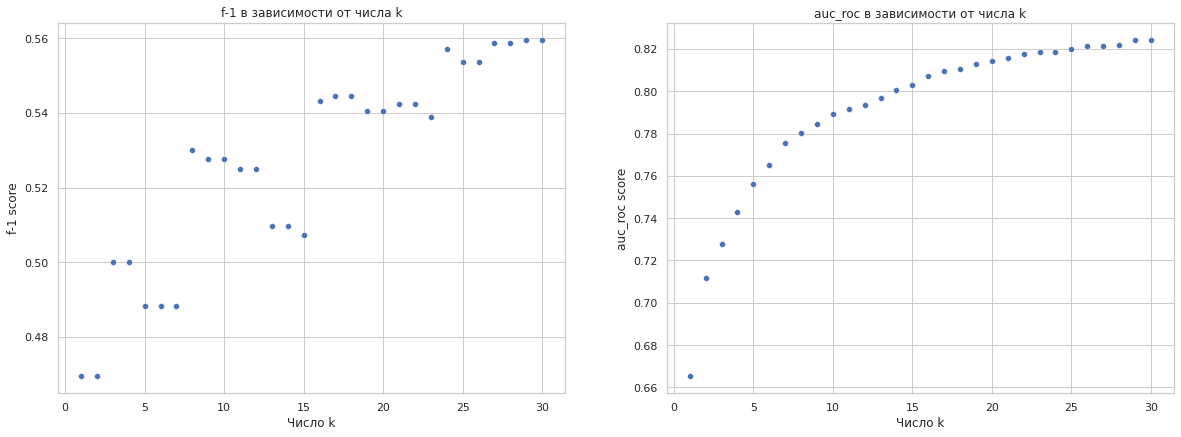

CPU times: user 9.49 s, sys: 24 ms, total: 9.51 s
Wall time: 9.54 s


In [49]:
%%time
model_building('k_nei', features_upsampled, target_upsampled, features_valid, target_valid, range(1, 31), range(1, 2), 0)

предыдущие графики повторяли аналогичные (или не очень сильно варьировали) но график изменения f-1 с ростом k заметно отличается ото всех остальных - рост f-1 идет по ступеням небольшими резко сменяющимися группами близких значений k

### downsampling

In [50]:
# Коэфициент для downsampling
1119 / 4335

0.25813148788927337

In [51]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) # уменьшение выборки признака, которого больше
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345) 
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


In [52]:
# применеие функции для downsampling
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.258)

# размеры выборок
print(features_downsampled.shape)
print(target_downsampled.shape)

(2237, 11)
(2237,)


#### решающее дерево

Для модели tree лучшее значение f-1 на валидационной выборке: 0.5536159600997506 при этом глубина дерева: 5
Для модели tree лучшее значение auc_roc на валидационной выборке: 0.8114114317542036 при этом глубина дерева: 6


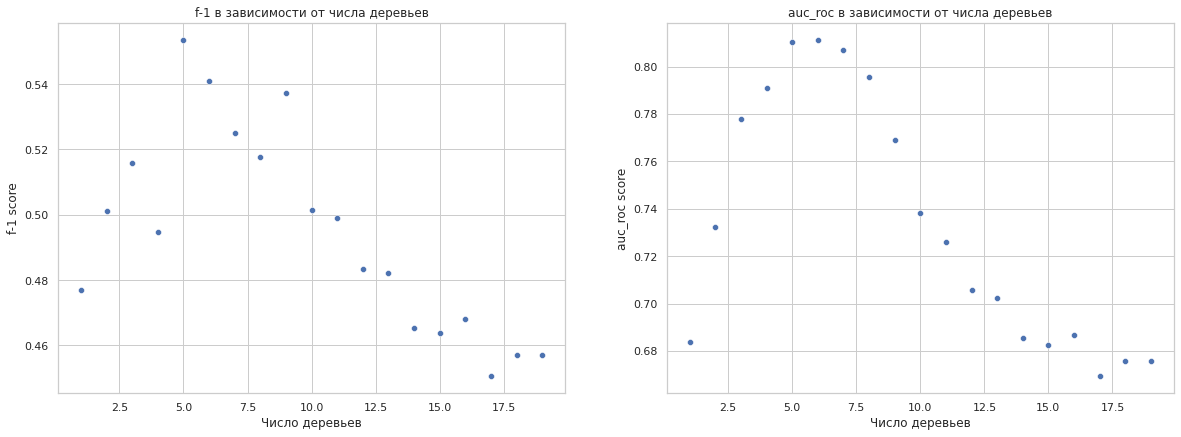

CPU times: user 574 ms, sys: 7.99 ms, total: 582 ms
Wall time: 588 ms


In [53]:
%%time
model_building('tree', features_downsampled, target_downsampled, features_valid, target_valid, range(1, 20), range(1, 2), 0)

здесь f-1 резко падает после глубины равной 5 

#### случайный лес

Для модели forest лучшее значение f-1 на валидационной выборке: 0.5922651933701657 при этом глубина дерева: 13 число деревьев 18
Для модели forest лучшее значение auc_roc на валидационной выборке: 0.8472466844299928 при этом глубина дерева: 8 число деревьев 28


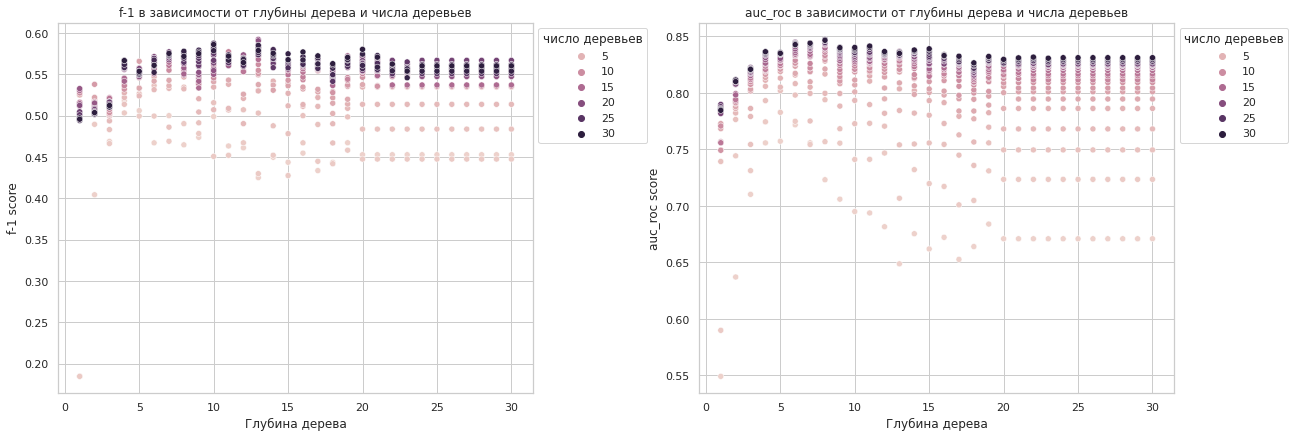

CPU times: user 1min, sys: 288 ms, total: 1min
Wall time: 1min


In [54]:
%%time
model_building('forest', features_downsampled, target_downsampled, features_valid, target_valid, range(1, 31), range(1, 31), 0)

#### модель k-ближних соседей

Для модели k_nei лучшее значение f-1 на валидационной выборке: 0.5663716814159291 при этом число k: 16
Для модели k_nei лучшее значение auc_roc на валидационной выборке: 0.8304053952340092 при этом число k: 17


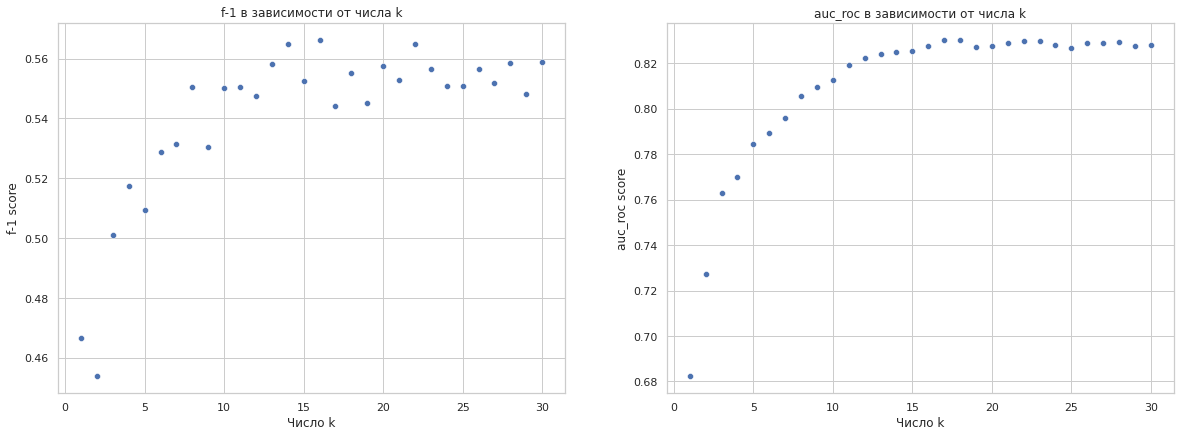

CPU times: user 5.26 s, sys: 24 ms, total: 5.28 s
Wall time: 5.45 s


In [55]:
%%time
model_building('k_nei', features_downsampled, target_downsampled, features_valid, target_valid, range(1, 31), range(1, 2), 0)

остальные графики сохраняют ранее видные тенденции, график f-1 при росте к при downsampling не так резок, как при upsampling, но более плавно отражает ту же тенденцию

Перед тем как проверять модели на тестовой выборке посмотрю какие из них дали наилучшее значение f-1 (выбирал оптимальные для f-1 гиперпараметры исходя из разных способов борьбы с дисбалансом и без неё) - в задании требуется достичь значения не меньше 0.59 **здесь, как и раньше оставлю еще и таблицу с тем, что раньше получалось** 

In [56]:
table_new = table_v2 = pd.DataFrame(data=[
    ['KNeighborsClassifier', None, 0.5, None, None, 5], 
    ['KNeighborsClassifier', 'upsampling', 0.56, None, None, 29],
    ['KNeighborsClassifier', 'downsampling', 0.56, None, None, 16],
    ['DecisionTreeClassifier', None, 0.56, 9, None, None],
    ['DecisionTreeClassifier', 'class-weight', 0.55, 7, None, None],
    ['DecisionTreeClassifier', 'upsampling', 0.55, 7, None, None],
    ['DecisionTreeClassifier', 'downsampling', 0.55, 5, None, None],
    ['RandomForestClassifier', None, 0.56, 23, 21, None],
    ['RandomForestClassifier', 'class-weight', 0.60, 9, 30, None],
    ['RandomForestClassifier', 'upsampling', 0.61, 12, 25, None],
    ['RandomForestClassifier', 'downsampling', 0.59, 13, 18, None]
    ], columns=['model', 'balance_type', 'f-1', 'depth', 'n_estimators', 'k'])

table_v2 = pd.DataFrame(data=[
    ['KNeighborsClassifier', None, 0.47, None, None, 3], 
    ['KNeighborsClassifier', 'upsampling', 0.55, None, None, 25],
    ['KNeighborsClassifier', 'downsampling', 0.55, None, None, 26],
    ['DecisionTreeClassifier', None, 0.54, 2, None, None],
    ['DecisionTreeClassifier', 'class-weight', 0.57, 5, None, None],
    ['DecisionTreeClassifier', 'upsampling', 0.57, 5, None, None],
    ['DecisionTreeClassifier', 'downsampling', 0.55, 3, None, None],
    ['RandomForestClassifier', None, 0.57, 22, 19, None],
    ['RandomForestClassifier', 'class-weight', 0.60, 11, 14, None],
    ['RandomForestClassifier', 'upsampling', 0.61, 10, 28, None],
    ['RandomForestClassifier', 'downsampling', 0.60, 7, 27, None]
    ], columns=['model', 'balance_type', 'f-1', 'depth', 'n_estimators', 'k'])

table_old = pd.DataFrame(data=[
    ['KNeighborsClassifier', None, 0.5, None, None, 5], 
    ['KNeighborsClassifier', 'upsampling', 0.55, None, None, 16],
    ['KNeighborsClassifier', 'downsampling', 0.56, None, None, 14],
    ['DecisionTreeClassifier', None, 0.53, 5, None, None],
    ['DecisionTreeClassifier', 'class-weight', 0.56, 5, None, None],
    ['DecisionTreeClassifier', 'upsampling', 0.56, 5, None, None],
    ['DecisionTreeClassifier', 'downsampling', 0.55, 5, None, None],
    ['RandomForestClassifier', None, 0.56, 17, 27, None],
    ['RandomForestClassifier', 'class-weight', 0.60, 8, 18, None],
    ['RandomForestClassifier', 'upsampling', 0.59, 9, 21, None],
    ['RandomForestClassifier', 'downsampling', 0.57, 8, 30, None]
    ], columns=['model', 'balance_type', 'f-1', 'depth', 'n_estimators', 'k'])


In [57]:
table_old.sort_values(by='f-1', ascending=False)

,model,balance_type,f-1,depth,n_estimators,k
8,RandomForestClassifier,class-weight,0.60,8.0,18.0,NaN
9,RandomForestClassifier,upsampling,0.59,9.0,21.0,NaN
10,RandomForestClassifier,downsampling,0.57,8.0,30.0,NaN
2,KNeighborsClassifier,downsampling,0.56,NaN,NaN,14.0
4,DecisionTreeClassifier,class-weight,0.56,5.0,NaN,NaN
5,DecisionTreeClassifier,upsampling,0.56,5.0,NaN,NaN
7,RandomForestClassifier,None,0.56,17.0,27.0,NaN
1,KNeighborsClassifier,upsampling,0.55,NaN,NaN,16.0
6,DecisionTreeClassifier,downsampling,0.55,5.0,NaN,NaN
3,DecisionTreeClassifier,None,0.53,5.0,NaN,NaN


In [58]:
table_v2.sort_values(by='f-1', ascending=False)

,model,balance_type,f-1,depth,n_estimators,k
9,RandomForestClassifier,upsampling,0.61,10.0,28.0,NaN
8,RandomForestClassifier,class-weight,0.60,11.0,14.0,NaN
10,RandomForestClassifier,downsampling,0.60,7.0,27.0,NaN
4,DecisionTreeClassifier,class-weight,0.57,5.0,NaN,NaN
5,DecisionTreeClassifier,upsampling,0.57,5.0,NaN,NaN
7,RandomForestClassifier,None,0.57,22.0,19.0,NaN
1,KNeighborsClassifier,upsampling,0.55,NaN,NaN,25.0
2,KNeighborsClassifier,downsampling,0.55,NaN,NaN,26.0
6,DecisionTreeClassifier,downsampling,0.55,3.0,NaN,NaN
3,DecisionTreeClassifier,None,0.54,2.0,NaN,NaN


In [59]:
table_new.sort_values(by='f-1', ascending=False)

,model,balance_type,f-1,depth,n_estimators,k
9,RandomForestClassifier,upsampling,0.61,12.0,25.0,NaN
8,RandomForestClassifier,class-weight,0.60,9.0,30.0,NaN
10,RandomForestClassifier,downsampling,0.59,13.0,18.0,NaN
1,KNeighborsClassifier,upsampling,0.56,NaN,NaN,29.0
2,KNeighborsClassifier,downsampling,0.56,NaN,NaN,16.0
3,DecisionTreeClassifier,None,0.56,9.0,NaN,NaN
7,RandomForestClassifier,None,0.56,23.0,21.0,NaN
4,DecisionTreeClassifier,class-weight,0.55,7.0,NaN,NaN
5,DecisionTreeClassifier,upsampling,0.55,7.0,NaN,NaN
6,DecisionTreeClassifier,downsampling,0.55,5.0,NaN,NaN


Лучшие показатели у RandomForestClassifier с применением различных способов борьбы с дисбалансом. KNeighborsClassifier показывает результат f-1 меньше других. Лучшим способом борьбы с дисбалансом был upsampling 
(в случае с DecisionTreeClassifier f1 несмотрю на борьбу с дисбалансом у моделей примерно одинаковое)

для тестирования возьму по одной модели с теми значениями гиперпараметров и способом борьбы с дисбалансом, которые для каждой из моделей показали наилучший результат

предыдущая версия:
наилучшие значения у RandomForestClassifier, хотя в случае, если для него не выполнять борьбу с дисбалансом некоторые другие модели могут показать результат лучше. Лучшим способом борьбы с дисбалансом было взвешивание классов (кроме модели k-ближних соседей где оно было неприменимым)
для тестирования возьму по одной модели с теми значениями гиперпараметров и способом борьбы с дисбалансом, которые для каждой из моделей показали наилучший результат

## Тестирование модели

In [60]:
target.value_counts()

0    5787
1    1485
Name: exited, dtype: int64

In [61]:
# Коэфициент для upsampling
5787 / 1485

3.896969696969697

In [62]:
# применеие функции для upsampling
features_upsampled_for_test, target_upsampled_for_test = upsample(features, target, 4)

# размеры выборок
print(features_upsampled_for_test.shape)
print(target_upsampled_for_test.shape)

(11727, 11)
(11727,)


### решающее дерево

In [63]:
%%time
model_tree_test = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')   

model_tree_test.fit(features, target)                    # обучение модели
predictions_tree_test = model_tree_test.predict(features_test)          # вычисление предсказаний

f1 = f1_score(target_test, predictions_tree_test)         # вычисление f1
       
probabilities_test = model_tree_test.predict_proba(features_test)   # вычисление вероятностей признаков
probabilities_one_test = probabilities_test[:, 1]         # значения вероятностей класса 1 (уход клиента)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) # вычисление значение fpr, tpr для roc-кривой
    
auc_roc = roc_auc_score(target_test, probabilities_one_test)  # вычисление auc_roc
    
print('значение f-1 на тестовой выборке:', f1, 'значение auc_roc на тестовой выборке::', auc_roc)
        

значение f-1 на тестовой выборке: 0.5214785214785215 значение auc_roc на тестовой выборке:: 0.7757303055789178
CPU times: user 38.7 ms, sys: 14 µs, total: 38.8 ms
Wall time: 37 ms


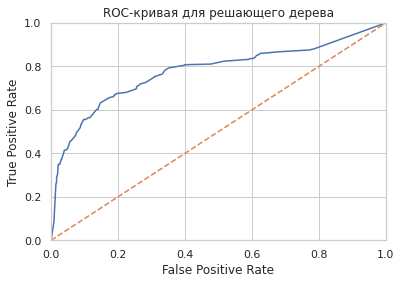

In [64]:
plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая для решающего дерева')  

plt.show()

### случайный лес

In [65]:
%%time
model_forest_test = RandomForestClassifier(random_state=12345, n_estimators=25, max_depth=12)
        
model_forest_test.fit(features_upsampled_for_test, target_upsampled_for_test)                    # обучение модели
predictions_forest_test = model_forest_test.predict(features_test)          # вычисление предсказаний
f1 = f1_score(target_test, predictions_forest_test)         # вычисление f1
        
probabilities_test = model_forest_test.predict_proba(features_test)   # вычисление вероятностей признаков
probabilities_one_test = probabilities_test[:, 1]         # значения вероятностей класса 1 (уход клиента)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) # вычисление значение fpr, tpr для roc-кривой
auc_roc = roc_auc_score(target_test, probabilities_one_test)   # вычисление auc_roc
            
print('значение f-1 на тестовой выборке:', f1, 'значение auc_roc на тестовой выборке::', auc_roc)

значение f-1 на тестовой выборке: 0.5958549222797928 значение auc_roc на тестовой выборке:: 0.8434043547332024
CPU times: user 288 ms, sys: 0 ns, total: 288 ms
Wall time: 290 ms


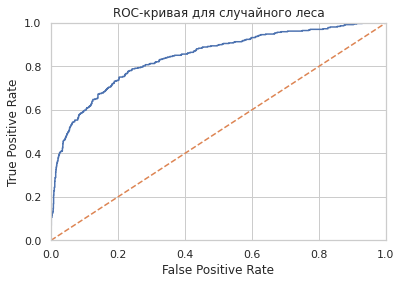

In [66]:
plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая для случайного леса')  

plt.show()

### модель k-ближних соседей

In [67]:
%%time
model_k_nei_test = KNeighborsClassifier(n_neighbors=29)
model_k_nei_test.fit(features_upsampled_for_test, target_upsampled_for_test)                    # обучение модели
predictions_k_nei_test = model_k_nei_test.predict(features_test)          # вычисление предсказаний
f1 = f1_score(target_test, predictions_k_nei_test)   # вычисление f1
    
probabilities_test = model_k_nei_test.predict_proba(features_test)   # вычисление вероятностей признаков
probabilities_one_test = probabilities_test[:, 1]         # значения вероятностей класса 1 (уход клиента)

auc_roc = roc_auc_score(target_test, probabilities_one_test)  # вычисление auc_roc

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) # вычисление значение fpr, tpr для roc-кривой
auc_roc = roc_auc_score(target_test, probabilities_one_test)   # вычисление auc_roc
            
print('значение f-1 на тестовой выборке:', f1, 'значение auc_roc на тестовой выборке::', auc_roc)

значение f-1 на тестовой выборке: 0.5649157581764123 значение auc_roc на тестовой выборке:: 0.8440323334267824
CPU times: user 411 ms, sys: 17 µs, total: 411 ms
Wall time: 586 ms


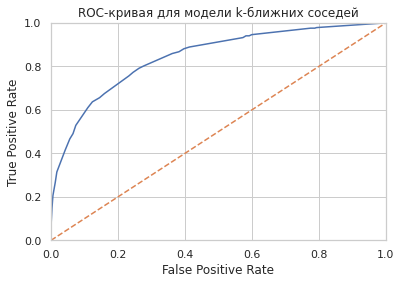

In [68]:
plt.figure()
plt.plot(fpr, tpr) # ROC кривая

plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели 

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])   

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  

plt.title('ROC-кривая для модели k-ближних соседей')  

plt.show()

### Вывод
Требуемого в задании значения f-1 не менее 0.59 удалось достичь на тестовой выборке только при использовании модели сучайного леса с оптимальным выбором гиперпараметров и применением upsampling (хотя вероятно downsampling и баланс классов для случайного лес тоже дадут требуемый результат)
то что при применени этой модели удалось достичь auc-roc равного почти 0,86 хороший показатель (с учетом того что дисбаланс классов учтен) вероятно требуемых значений f-1 удастся достич и при других порогах разделения классов



я решил попробовать взять модель с самым низким f1 (она была сделана на несбалансированной выборке) и посмотреть как меняется f1 в зависимости от изменения порога. А потом еще посмотреть как будет менятся у самой лучшей модели (со сбалансированной выборкой):


### изменение порога вероятности для модели с самым низким f1 (несбалансированнаяя выборка)

In [69]:
%%time
model_k_nei_test = KNeighborsClassifier(n_neighbors=5)
model_k_nei_test.fit(features, target)                    # обучение модели
 
probabilities_test = model_k_nei_test.predict_proba(features_test)   # вычисление вероятностей признаков
probabilities_one_test = probabilities_test[:, 1]         # значения вероятностей класса 1 (уход клиента)

best_f1 = 0
best_treshold = 0
f1_50 = 0

for threshold in np.arange(0, 1, 0.02):
    predictions_k_nei_test = probabilities_one_test > threshold                 
    f1 = f1_score(target_test, predictions_k_nei_test)   # вычисление f1      

    if f1 > best_f1:
        best_f1 = f1
        best_treshold = threshold
        
    if threshold == 0.5:
        f1_50 = f1

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) # вычисление значение fpr, tpr для roc-кривой
auc_roc = roc_auc_score(target_test, probabilities_one_test)   # вычисление auc_roc

print('auc-roc равно:', auc_roc)            
print('при пороге вероятности 0.5 значение f1:', f1_50)
print('лучшее значение f1:', best_f1, 'при пороге веорятности', best_treshold)

auc-roc равно: 0.7922315671432576
при пороге вероятности 0.5 значение f1: 0.5247524752475248
лучшее значение f1: 0.5599051008303677 при пороге веорятности 0.2
CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 154 ms


### изменение порога вероятности для модели с самым высоким f1 (сбалансированнаяя выборка)

In [70]:
%%time

model_forest_test = RandomForestClassifier(random_state=12345, n_estimators=25, max_depth=12)      
model_forest_test.fit(features_upsampled_for_test, target_upsampled_for_test)                    # обучение модели
 
probabilities_test = model_forest_test.predict_proba(features_test)   # вычисление вероятностей признаков
probabilities_one_test = probabilities_test[:, 1]         # значения вероятностей класса 1 (уход клиента)

best_f1 = 0
best_treshold = 0
f1_50 = 0

for threshold in np.arange(0, 1, 0.02):
    predictions_forest_test = probabilities_one_test > threshold                 
    f1 = f1_score(target_test, predictions_forest_test)   # вычисление f1      

    if f1 > best_f1:
        best_f1 = f1
        best_treshold = threshold
        
    if threshold == 0.5:
        f1_50 = f1

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) # вычисление значение fpr, tpr для roc-кривой
auc_roc = roc_auc_score(target_test, probabilities_one_test)   # вычисление auc_roc

print('auc-roc равно:', auc_roc)            
print('при пороге вероятности 0.5 значение f1:', f1_50)
print('лучшее значение f1:', best_f1, 'при пороге веорятности', best_treshold)

auc-roc равно: 0.8434043547332024
при пороге вероятности 0.5 значение f1: 0.5958549222797928
лучшее значение f1: 0.6059743954480796 при пороге веорятности 0.56
CPU times: user 316 ms, sys: 1e+03 ns, total: 316 ms
Wall time: 322 ms



auc_roc у обеих моделей достаточно высокий (по крайней мере похожий), но у той, которая была на несбалансированной выборке f1 был низким (зато при сильном изменении порога вероятности заметно вырос)
у другой модели (Случайного леса) тоже вырос, но не так сильно и не при таком сильном изменении порога.


/tmp/ipykernel_119/3275821890.py:1: RuntimeWarning: divide by zero encountered in true_divide
  tpr_to_fpr = tpr / fpr
/tmp/ipykernel_119/3275821890.py:1: RuntimeWarning: invalid value encountered in true_divide
  tpr_to_fpr = tpr / fpr


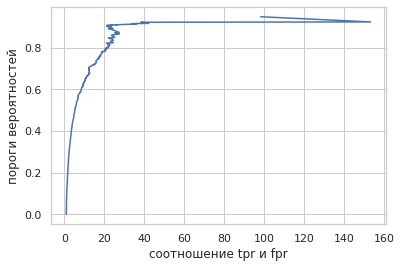

In [71]:
tpr_to_fpr = tpr / fpr

plt.figure()
plt.plot(tpr_to_fpr, thresholds) 


plt.xlabel('соотношение tpr и fpr') 
plt.ylabel('пороги вероятностей')  

plt.show()